In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

orders= pd.read_csv("orders.csv")
aisles=pd.read_csv("aisles.csv")
priors=pd.read_csv("order_products__prior.csv")
train=pd.read_csv("order_products__train.csv")
dept=pd.read_csv("departments.csv")
product_data=pd.read_csv("products.csv")

In [2]:
priors.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [7]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
product_data.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
orders.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [10]:
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [11]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### Frequency of Day of week Vs Hour of day and Frequency of order by hour of day.


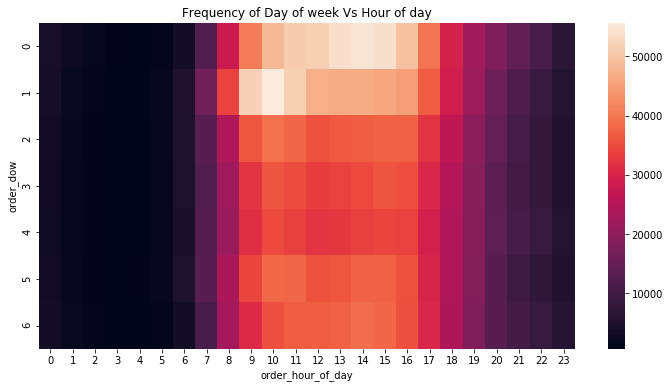

In [12]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

### Number of orders for a product Vs probability of reordering.


In [13]:
order_details= pd.merge(priors, product_data, on= 'product_id')
order_details

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16
5,537,33120,2,1,Organic Egg Whites,86,16
6,582,33120,7,1,Organic Egg Whites,86,16
7,608,33120,5,1,Organic Egg Whites,86,16
8,623,33120,1,1,Organic Egg Whites,86,16
9,689,33120,4,1,Organic Egg Whites,86,16


In [14]:
#Now grouping the data based on the number of times they were reordered with the order it and counting it

product_info= order_details.groupby('product_name')['reordered', 'order_id'].aggregate({'reordered':sum , 'order_id':len})
product_info.rename(columns={'order_id' : 'order_count'}, inplace= True)
product_info['reorder_rate'] = product_info.reordered/product_info.order_count

product_info


,reordered,order_count,reorder_rate
product_name,,,
#2 Coffee Filters,257,777,0.330759
#2 Cone White Coffee Filters,3,13,0.230769
#2 Mechanical Pencils,0,8,0.000000
#4 Natural Brown Coffee Filters,89,241,0.369295
& Go! Hazelnut Spread + Pretzel Sticks,87,164,0.530488
'Swingtop' Premium Lager,0,1,0.000000
(70% Juice!) Mountain Raspberry Juice Squeeze,16,28,0.571429
+Energy Black Cherry Vegetable & Fruit Juice,11,29,0.379310
".5\"" Waterproof Tape",0,8,0.000000


Text(0.5, 1.0, 'Product Reordering Probability')

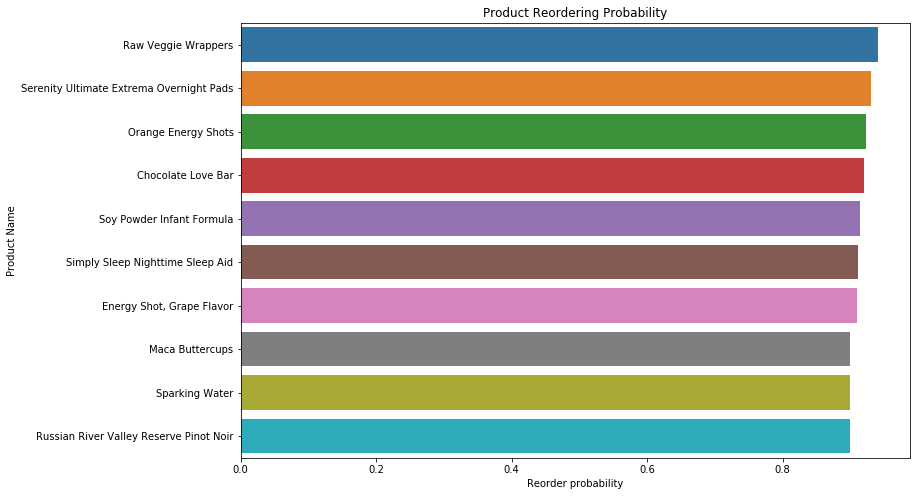

In [15]:
#Join with the products table to plot 

reorder_prob = product_info[product_info.reorder_rate > 0.75].sort_values('reorder_rate', ascending = False)
reorder_prob_new = pd.merge(reorder_prob, product_data, on= 'product_name')

top = 10
plt.figure(figsize=(12, 8))
sns.barplot(reorder_prob_new.reorder_rate[:top], reorder_prob_new.product_name[:top])
plt.xlabel('Reorder probability')
plt.ylabel('Product Name')
plt.title('Product Reordering Probability')


### Percentage of organic Vs non organic products being ordered.


In [16]:
organic = product_data[product_data['product_name'].str.contains('organic', case=False)]
non_organic = product_data[~product_data['product_name'].str.contains('organic', case=False)]

C:\Users\CSUFTitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\CSUFTitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


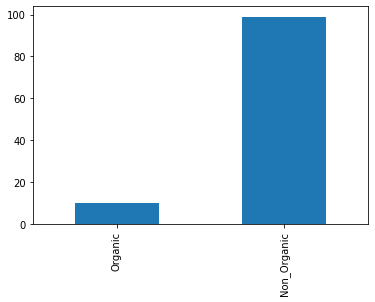

In [17]:
organic_count = len(organic.index)
non_organic_count = len(non_organic.index)

organic['Key'] = 'organic'
non_organic['Key'] = 'non_organic'
df = pd.merge(organic.iloc[:,[0,-1]], non_organic.iloc[:, [0,-1]], how='outer', on='product_id').drop('product_id', axis=1).rename(columns={"Key_x": "Organic", "Key_y":"Non_Organic"}).count()
df['Organic']= df.Organic/(df.Organic+df.Non_Organic)*100
df['Non_Organic']= df.Non_Organic/(df.Organic+df.Non_Organic)*100
df.plot(kind="bar")


### Most Reordered products Vs Reorder probability.


In [18]:
#Now grouping the data based on the number of times they were reordered with the order it and counting it

product_info_new= order_details.groupby('product_id')['reordered', 'order_id'].aggregate({'reordered':sum , 'order_id':len})
product_info_new.rename(columns={'order_id' : 'order_count'}, inplace= True)
product_info_new['reorder_rate'] = product_info_new.reordered/product_info_new.order_count

most_reordered = product_info_new[product_info_new.order_count > 100].sort_values('reorder_rate', ascending = False)
most_reordered.head()

,reordered,order_count,reorder_rate
product_id,,,
27740,93,101,0.920792
38251,99,111,0.891892
10236,113,129,0.875969
20598,98,112,0.875000
35496,389,451,0.862528


Text(0.5, 1.0, 'Products with highest reorder ratio')

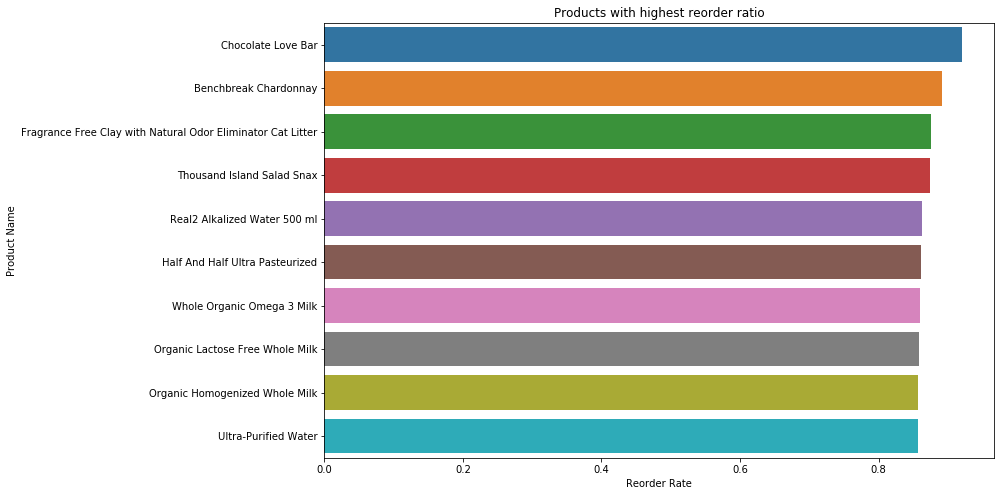

In [19]:
#Join with the products table to plot 

most_reordered_product = pd.merge(most_reordered, product_data, on= 'product_id')

top = 10
plt.figure(figsize=(12, 8))
sns.barplot(most_reordered_product.reorder_rate[:top], most_reordered_product.product_name[:top])
plt.xlabel('Reorder Rate')
plt.ylabel('Product Name')
plt.title('Products with highest reorder ratio')

### Number of customers Vs No of orders per customers

In [20]:
grouped = orders.groupby('user_id')['order_id'].apply(lambda x: len(x.unique())).reset_index()
grouped = grouped.groupby('order_id').aggregate("count")


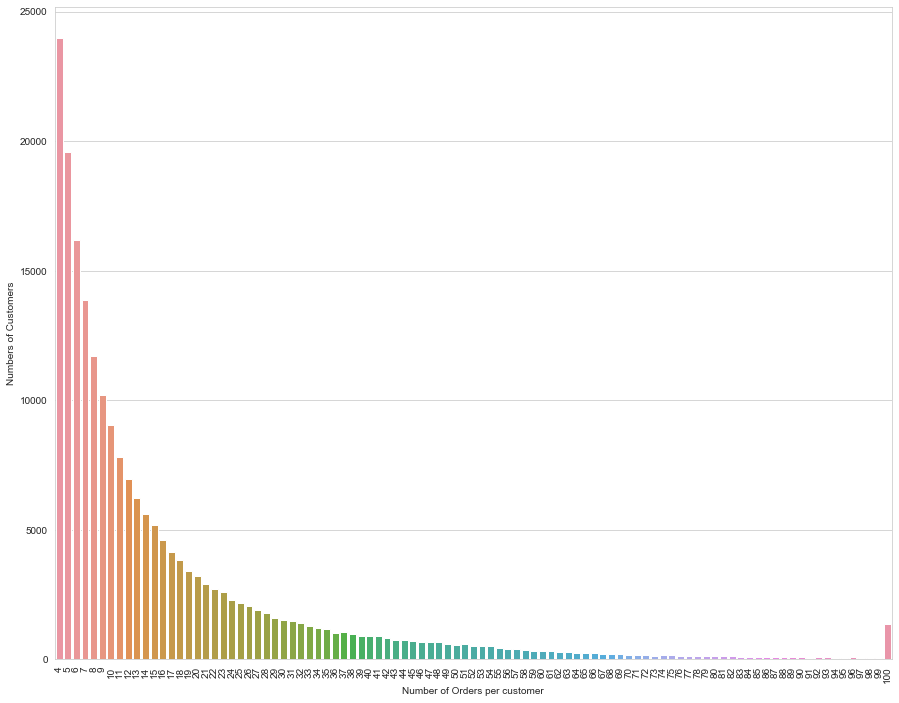

In [21]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(grouped.index, grouped.user_id)
plt.ylabel('Numbers of Customers')
plt.xlabel('Number of Orders per customer')
plt.xticks(rotation='vertical')
plt.show()

### Departments Vs number of products available in each department.

In [22]:
items  = pd.merge(left =pd.merge(left=product_data, right=dept, how='left'), right=aisles, how='left')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


C:\Users\CSUFTitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


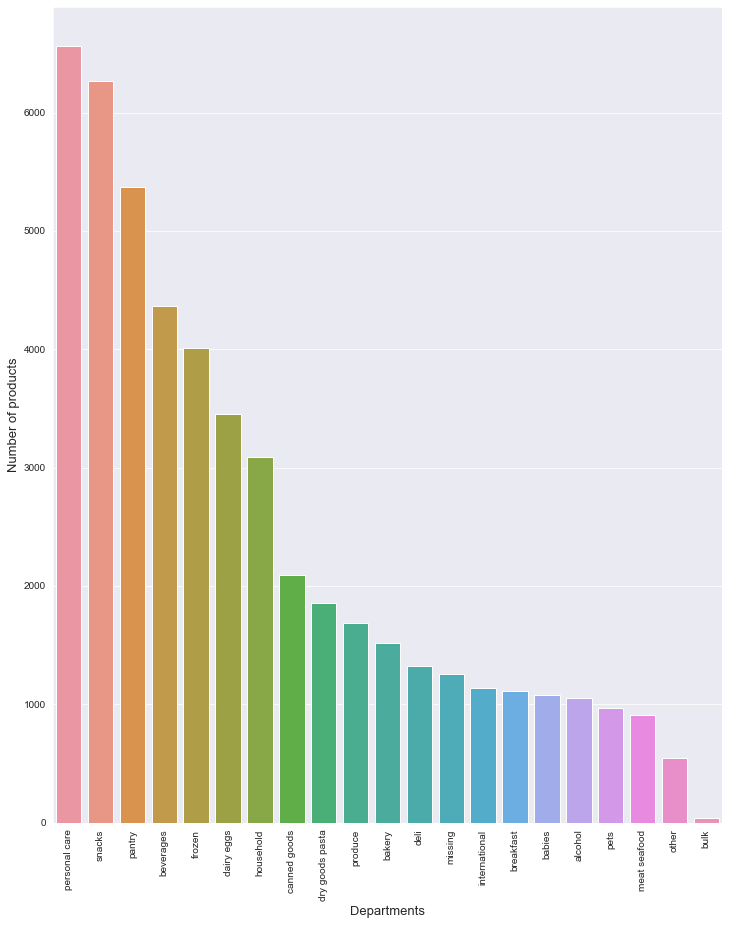

In [23]:

grouped = items.groupby("department")["product_id"].aggregate({'Total_products': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped.sort_values(by='Total_products', ascending=False, inplace=True)

grouped  = grouped.groupby(['department']).sum()['Total_products'].sort_values(ascending=False)

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()

### Most frequently ordered products Vs Number of orders containing these products.


In [24]:
goods = pd.merge(left=pd.merge(left=product_data, right=dept, how='left'), right=aisles, how='left')
# to retain '-' and make product names more "standard"
goods.product_name = goods.product_name.str.replace(' ', '_').str.lower() 


Wall time: 25.8 s


Text(0.5, 0, 'Product Name')

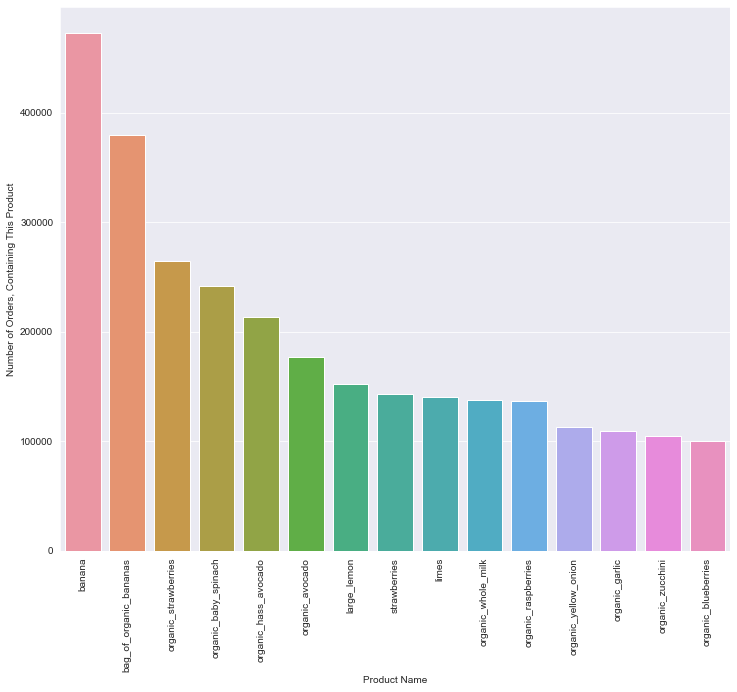

In [25]:
%%time
# popular products (total set, not only train)
top = 15
top_products = pd.merge(
    # to see train: 
    # left=pd.DataFrame(order_details[order_details.eval_set == 'train'].groupby(['product_id'])['order_id']\
    left=pd.DataFrame(order_details.groupby(['product_id'])['order_id']\
    .apply(lambda x: len(x.unique())).sort_values(ascending=False)[:top].reset_index('product_id')),
    right=goods,
    how='left')

f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(top_products.product_name, top_products.order_id)
plt.ylabel('Number of Orders, Containing This Product')
plt.xlabel('Product Name')

### Number of Orders Vs Number of products in an order.


Most common order contains: 5 products
Wall time: 7.67 s


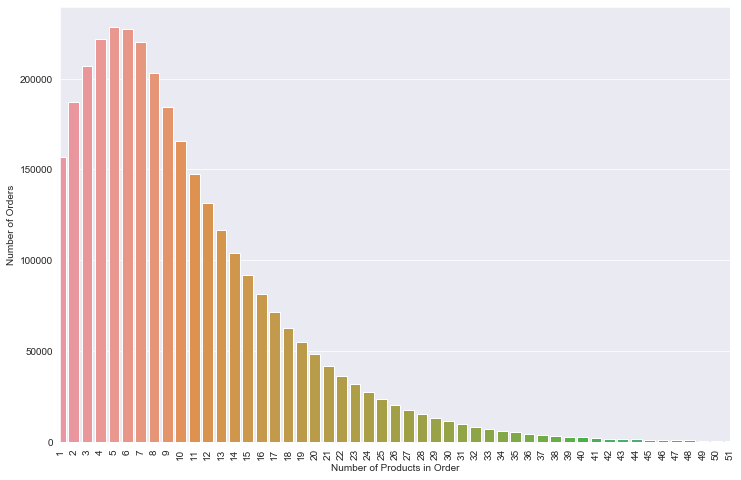

In [26]:
%%time
ord_by_prods = order_details.groupby("order_id")["add_to_cart_order"]\
.aggregate(np.max).reset_index()['add_to_cart_order'].value_counts()

print('Most common order contains: {} products'.format(
    ord_by_prods[ord_by_prods.values == ord_by_prods.max()].index.values[0]))

# plot it
plt.figure(figsize=(12, 8))
plt.xticks(rotation='vertical')
sns.barplot(ord_by_prods.index, ord_by_prods.values)
plt.ylabel('Number of Orders')
plt.xlabel('Number of Products in Order')
plt.xlim([0, 50])
pass

### Orders Count Vs Day of the Week.


In [27]:
prods = pd.DataFrame()
prods['orders'] = priors.groupby(priors.product_id).size()
prods['reorders'] = priors['reordered'].groupby(priors.product_id).sum()
prods['reorder_rate'] = (prods.reorders/prods.orders)

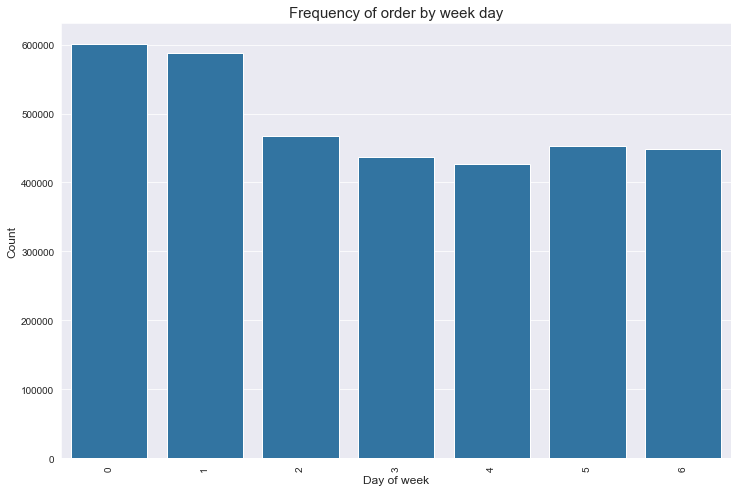

In [28]:
#Order frequency across a week
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

### Orders Count Vs Hour of the day.


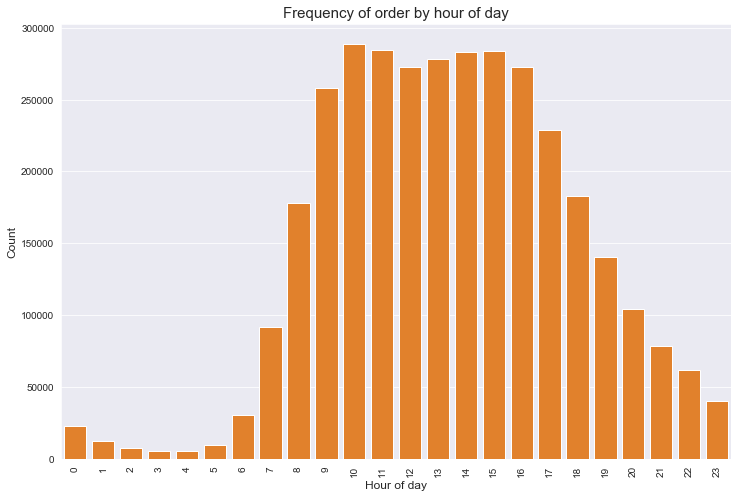

In [29]:
#Order frequency across a day
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()